In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

df = pd.read_csv('rentprediction_dataset_v5.csv')

y = df['rent']
X = df.drop(columns={'rent'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Selected Features R-squared value: {r2}')
print(f'Selected Features Mean Squared Error: {mse}')
print(f'Selected Features Root Mean Squared Error: {rmse}')
print(f'Selected Features Mean Absolute Error: {mae}')
print(f'Selected Features Mean Absolute Percentage Error: {mape}')

Selected Features R-squared value: 0.8355001328956004
Selected Features Mean Squared Error: 424990.01475028245
Selected Features Root Mean Squared Error: 651.9125821383435
Selected Features Mean Absolute Error: 337.42757062146893
Selected Features Mean Absolute Percentage Error: 0.10765444066504976


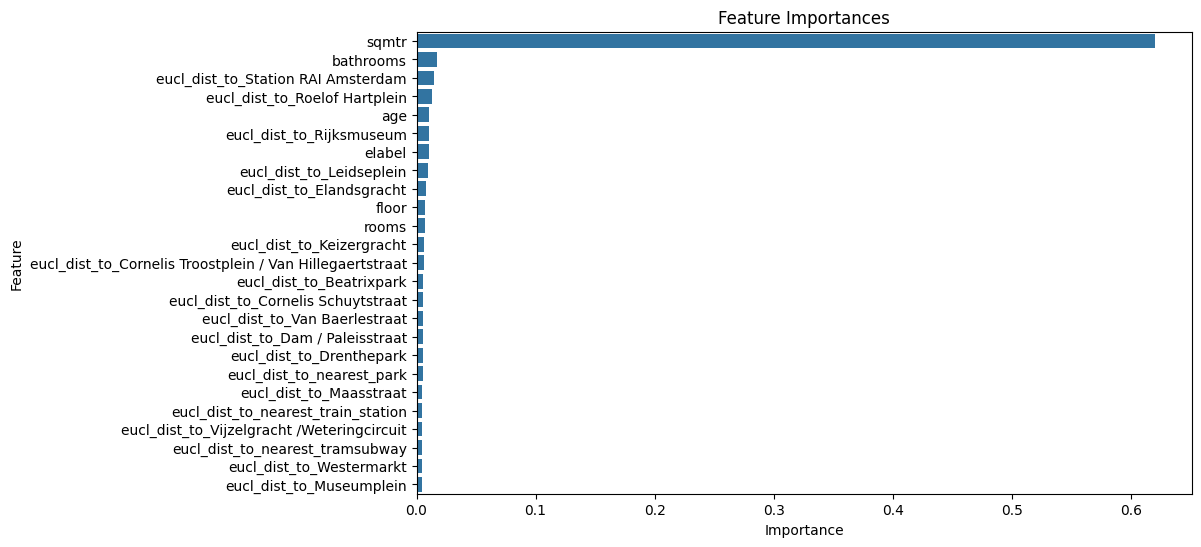

[0.6197816017378848,
 0.01756831199198751,
 0.01472484251303272,
 0.013277520814031808,
 0.010779715336131307,
 0.010296558374448496,
 0.010110226788918061,
 0.009842790046435235,
 0.008351055888926,
 0.007384620271149189,
 0.006754685658542285,
 0.005973306642669996,
 0.005926389499293604,
 0.005842080351212901,
 0.005755913117135307,
 0.005736664592514656,
 0.005677640707753594,
 0.005628330309186062,
 0.0056198569687082684,
 0.004915482775055986,
 0.004677308774782293,
 0.004630095541440613,
 0.004582514686417373,
 0.00457505036877664,
 0.004504158063065701,
 0.004117087537675327,
 0.004116914607979749,
 0.003904477985259874,
 0.0038184572679635874,
 0.003747844171931947,
 0.0036247976760582948,
 0.003456464336509313,
 0.0033075296369221934,
 0.0032642324639249867,
 0.0032375799109597386,
 0.0031229638900159107,
 0.003040244233283357,
 0.0029502418939563757,
 0.0028912738381075185,
 0.002790432641948056,
 0.0027873892414662003,
 0.0025478413593876766,
 0.0025452228855937253,
 0.0025

In [22]:
feature_names = X.columns


importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]

feature_importances = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(25))
plt.title('Feature Importances')
plt.show()

feature_importances['Importance'].to_list()


In [2]:
X_15_features = df[['sqmtr',
 'bathrooms',
 'eucl_dist_to_Station RAI Amsterdam',
 'eucl_dist_to_Roelof Hartplein',
 'age',
 'eucl_dist_to_Rijksmuseum',
 'elabel',
 'eucl_dist_to_Leidseplein',
 'eucl_dist_to_Elandsgracht',
 'floor',
 'rooms',
 'eucl_dist_to_Keizergracht',
 'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat',
 'eucl_dist_to_Beatrixpark',
 'eucl_dist_to_Cornelis Schuytstraat']]

X_train, X_test, y_train, y_test = train_test_split(X_15_features, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Selected Features R-squared value: {r2}')
print(f'Selected Features Mean Squared Error: {mse}')
print(f'Selected Features Root Mean Squared Error: {rmse}')
print(f'Selected Features Mean Absolute Error: {mae}')
print(f'Selected Features Mean Absolute Percentage Error: {mape}')

Selected Features R-squared value: 0.8465510911312133
Selected Features Mean Squared Error: 396439.5545813559
Selected Features Root Mean Squared Error: 629.6344610814722
Selected Features Mean Absolute Error: 316.52209039548023
Selected Features Mean Absolute Percentage Error: 0.10003827699225283


In [3]:
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(1, 101, 5),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
}

rfr = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,   # Use all available cores
    scoring='neg_mean_absolute_error'
)

# Fit the model
random_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model using cross-validation
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.7s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.4s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.6s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.6s
[CV] END max_depth=31, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  38.1s
[CV] END max_depth=51, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=  42.5s
[CV] END max_depth=51, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=  43.8s
[CV] END max_depth=51, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=  45.0s
[CV] END max_depth=51, min_samples_leaf=7, min_samples_split=2, n_estimators=400; total time=  46.2s
[CV] END max_depth=51, min_s

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_15_features, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(random_state=42, n_estimators= 700, min_samples_split= 4, min_samples_leaf= 3, max_depth= 81)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Selected Features R-squared value: {r2}')
print(f'Selected Features Mean Squared Error: {mse}')
print(f'Selected Features Root Mean Squared Error: {rmse}')
print(f'Selected Features Mean Absolute Error: {mae}')
print(f'Selected Features Mean Absolute Percentage Error: {mape}')

Selected Features R-squared value: 0.8419465304194442
Selected Features Mean Squared Error: 408335.5661664072
Selected Features Root Mean Squared Error: 639.0113975246508
Selected Features Mean Absolute Error: 325.0399748891483
Selected Features Mean Absolute Percentage Error: 0.10256023991904652


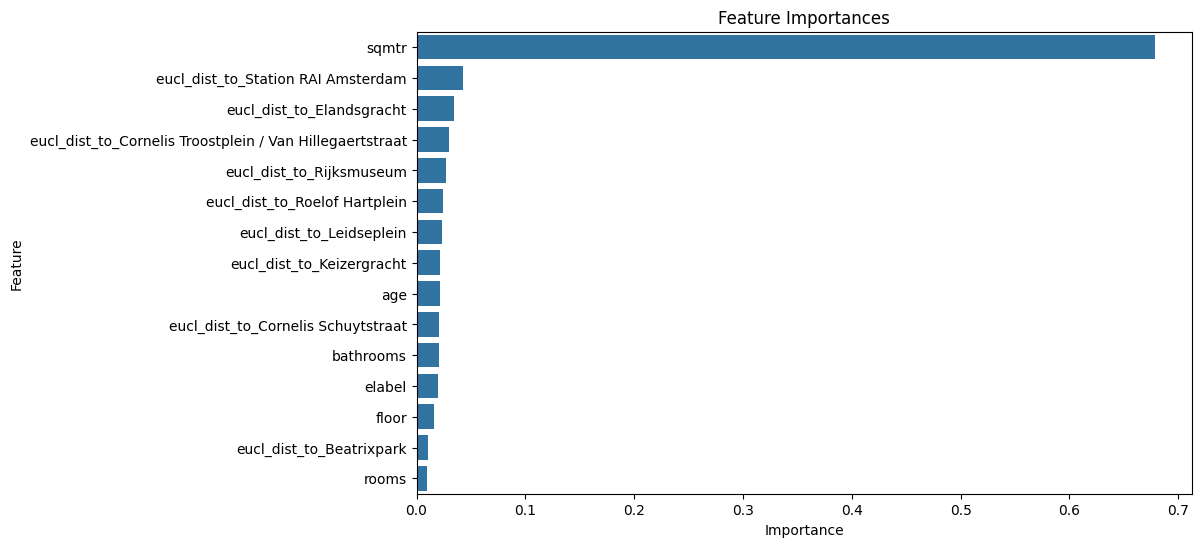

[0.6782829603138728,
 0.04314581722094145,
 0.034455284795112194,
 0.02948740510432299,
 0.02705152906208057,
 0.024144336966662985,
 0.023315571578365557,
 0.021432678145355648,
 0.021276842560302087,
 0.02107025245211934,
 0.02073580019938085,
 0.01946354854703104,
 0.01567925326753661,
 0.010661369142514449,
 0.009797350644401527]

In [13]:
feature_names = X_15_features.columns


importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]

feature_importances = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(25))
plt.title('Feature Importances')
plt.show()

feature_importances['Importance'].to_list()